In [2]:
import h5py
import numpy as np
L = h5py.File(conf.labelfile)
print(L['pts'])

# jj = np.array(L['pts'])

<HDF5 dataset "pts": shape (5348, 4, 1, 2), type "<f8">


In [1]:
import janLegConfig as conf
reload(conf)
import multiResData
reload(multiResData)

multiResData.createDB(conf)

Done 0 of 6 movies, count:583 val:0
Done 1 of 6 movies, count:1306 val:0
Done 2 of 6 movies, count:2471 val:0
Done 3 of 6 movies, count:3112 val:0
Done 4 of 6 movies, count:3112 val:862
Done 5 of 6 movies, count:4486 val:862
4486,862 number of pos examples added to the db and valdb


In [3]:
import os
import lmdb
import janLegConfig as conf

lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
env = lmdb.open(lmdbfilename, readonly = True)
print(env.stat())

{'branch_pages': 8L, 'leaf_pages': 190L, 'overflow_pages': 76262L, 'psize': 4096L, 'depth': 3L, 'entries': 4486L}


In [4]:
cursor = env.begin().cursor()

In [6]:
import multiResData
import multiPawTools
import matplotlib.pyplot as plt
reload(multiResData)

ii,locs = multiPawTools.readLMDB(cursor,2,conf.imsz,multiResData)
locs = multiResData.sanitizelocs(locs)

In [7]:
np.isnan(locs[1][0][0])

False

[[ 118.  172.]
 [ 114.  185.]
 [ 163.  179.]
 [ 147.  191.]]


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/numpy-1.12.0.dev0+9cfdb21-py2.7-linux-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will return a copy of the mask. In the future, it will try to return both as views.
  FutureWarning
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


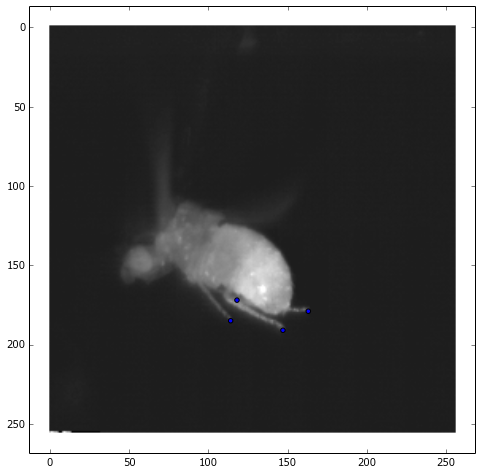

In [8]:
plt.figure(figsize=(8,8))
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(ii[0,0,:,:])

print(locs[0])

xlocs,ylocs  = zip(*locs[0])
plt.scatter(xlocs,ylocs,hold=True)

In [ ]:
import multiResTrain
reload(multiResTrain)
import janLegConfig as conf
reload(conf)

multiResTrain.train(conf)

Initialized the network
 Iter 0, Training Loss= 68289.320312
 Iter 0, Minibatch Loss= 68245.735577
Saved state to /home/mayank/work/tensorflow/cachejanLeg/janLeg_0.ckpt